In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

In [2]:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.decomposition import PCA

In [26]:
# reading data into dataframe
behavior= pd.read_csv("E:/Data Science Material/AssignmentToSubmit/Unsupervised1/CC_GENERAL.csv")

In [6]:
behavior.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(behavior)

Number of variables,18
Number of observations,8950
Total Missing (%),0.2%
Total size in memory,1.2 MiB
Average record size in memory,144.0 B
Numeric,16
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,1


In [81]:
behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [76]:
behavior['Monthly_Avg_Purchase'] = behavior['PURCHASES']/behavior['TENURE']
behavior['Monthly_Cash_Advance'] = behavior['CASH_ADVANCE']/behavior['TENURE']
behavior['Limit_Usage'] = behavior['BALANCE']/behavior['CREDIT_LIMIT']

In [77]:
behavior['Purchase_Type'] = np.where((behavior.ONEOFF_PURCHASES==0) & (behavior.INSTALLMENTS_PURCHASES==0), "None",
                                 (np.where((behavior.ONEOFF_PURCHASES>0) & (behavior.INSTALLMENTS_PURCHASES==0), "One_Of",
                                        (np.where((behavior.ONEOFF_PURCHASES==0) & (behavior.INSTALLMENTS_PURCHASES>0), "Installment_Purchases","Both")))))

In [78]:
numeric_var_names=[key for key in dict(behavior.dtypes) if dict(behavior.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(behavior.dtypes) if dict(behavior.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Monthly_Avg_Purchase', 'Monthly_Cash_Advance', 'Limit_Usage']
['CUST_ID', 'Purchase_Type']


In [79]:
behavior_num=behavior[numeric_var_names]
behavior_num.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Limit_Usage
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,0.222223
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429


In [121]:
behavior_num['BALANCE'].mode()[0]

0.0

In [80]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=behavior_num.apply(lambda x: var_summary(x)).T

In [32]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.138560
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.570000
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.250000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.000000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.211760
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.500000


In [33]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

behavior_num=behavior_num.apply(lambda x: outlier_capping(x))

In [34]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

behavior_num=behavior_num.apply(lambda x: Missing_imputation(x))

In [35]:
behavior_num.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Limit_Usage
BALANCE,1.000000,0.336473,0.165697,0.155082,0.093372,0.541226,-0.087193,0.070796,-0.072010,0.463637,0.445766,0.133319,0.528972,0.344744,0.587668,-0.331618,0.074122,0.162593,0.516470,0.578120
BALANCE_FREQUENCY,0.336473,1.000000,0.170515,0.137893,0.153734,0.107785,0.232890,0.202845,0.179472,0.193894,0.162818,0.212610,0.098461,0.092491,0.208279,-0.098040,0.121525,0.166385,0.093842,0.448961
PURCHASES,0.165697,0.170515,1.000000,0.885793,0.708735,-0.091164,0.504218,0.608351,0.400843,-0.149419,-0.099497,0.780817,0.367477,0.536270,0.131455,0.202887,0.107263,0.994358,-0.095085,-0.085801
ONEOFF_PURCHASES,0.155082,0.137893,0.885793,1.000000,0.333809,-0.064195,0.349884,0.683819,0.158892,-0.103046,-0.067593,0.630735,0.342667,0.482418,0.064248,0.145981,0.080378,0.883943,-0.066990,-0.066100
INSTALLMENTS_PURCHASES,0.093372,0.153734,0.708735,0.333809,1.000000,-0.102052,0.551693,0.248240,0.634500,-0.162397,-0.111387,0.687538,0.239973,0.369886,0.148561,0.215048,0.103310,0.700536,-0.105991,-0.090557
CASH_ADVANCE,0.541226,0.107785,-0.091164,-0.064195,-0.102052,1.000000,-0.249835,-0.104954,-0.207395,0.683400,0.710309,-0.112613,0.314398,0.425517,0.257143,-0.179068,-0.083485,-0.087192,0.983706,0.260306
PURCHASES_FREQUENCY,-0.087193,0.232890,0.504218,0.349884,0.551693,-0.249835,1.000000,0.501343,0.862934,-0.312493,-0.238395,0.642234,0.119658,0.120897,0.001043,0.305802,0.061506,0.504918,-0.248987,-0.221306
ONEOFF_PURCHASES_FREQUENCY,0.070796,0.202845,0.608351,0.683819,0.248240,-0.104954,0.501343,1.000000,0.142329,-0.113575,-0.081339,0.601289,0.296128,0.278313,-0.016426,0.157531,0.082466,0.607920,-0.106243,-0.097239
PURCHASES_INSTALLMENTS_FREQUENCY,-0.072010,0.179472,0.400843,0.158892,0.634500,-0.207395,0.862934,0.142329,1.000000,-0.265907,-0.200169,0.593674,0.060279,0.097830,0.032330,0.250087,0.073275,0.396831,-0.208256,-0.178811
CASH_ADVANCE_FREQUENCY,0.463637,0.193894,-0.149419,-0.103046,-0.162397,0.683400,-0.312493,-0.113575,-0.265907,1.000000,0.881092,-0.151307,0.134731,0.215544,0.203585,-0.253292,-0.129136,-0.144522,0.681374,0.398012


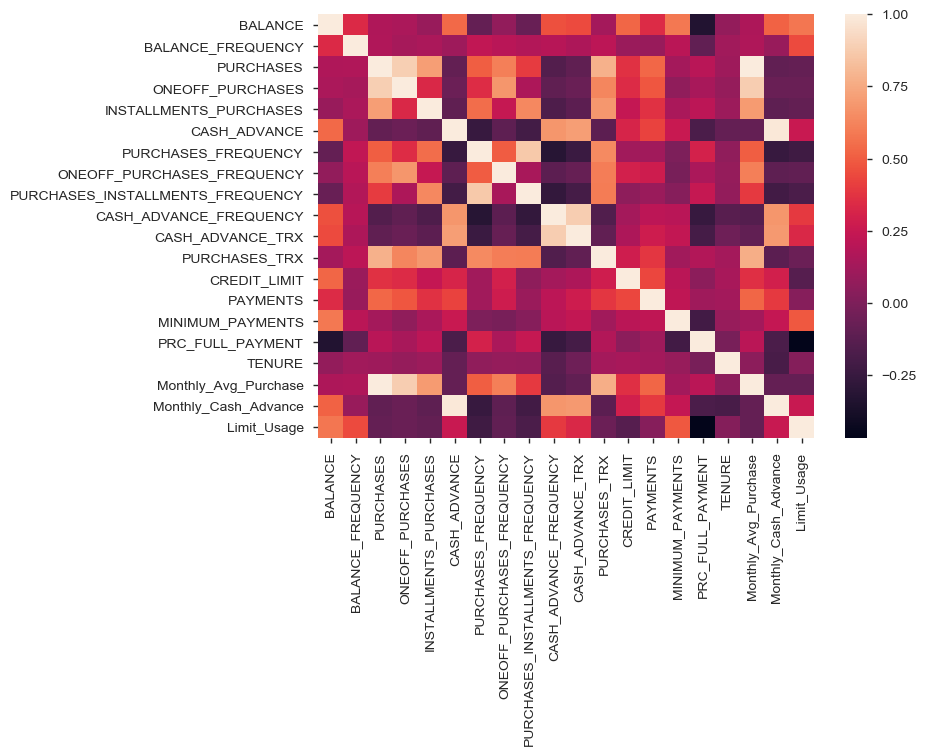

In [36]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(behavior_num.corr())

In [44]:
behavior_cat = behavior[cat_var_names]
behavior_cat.head(10)

,CUST_ID,Purchase_Type
0,C10001,Installment_Purchases
1,C10002,None
2,C10003,One_Of
3,C10004,One_Of
4,C10005,One_Of
5,C10006,Installment_Purchases
6,C10007,Both
7,C10008,Installment_Purchases
8,C10009,Both
9,C10010,One_Of


In [45]:
behavior_cat.Purchase_Type[behavior_cat.Purchase_Type == 'None']=1
behavior_cat.Purchase_Type[behavior_cat.Purchase_Type == 'One_Of']=2
behavior_cat.Purchase_Type[behavior_cat.Purchase_Type == 'Installment_Purchases']=3
behavior_cat.Purchase_Type[behavior_cat.Purchase_Type == 'Both']=4

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [46]:
behavior_cat.head(10)

,CUST_ID,Purchase_Type
0,C10001,3
1,C10002,1
2,C10003,2
3,C10004,2
4,C10005,2
5,C10006,3
6,C10007,4
7,C10008,3
8,C10009,4
9,C10010,2


In [54]:
behavior_cat=behavior_cat.drop(['CUST_ID'], axis=1)

In [55]:
behavior_new = pd.concat([behavior_num, behavior_cat], axis=1)
behavior_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Limit_Usage,Purchase_Type
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,2.0,1000.0,201.802084,139.509787,0.000000,12.0,7.950000,0.000000,0.040901,3
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.000000,536.912124,0.457495,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,12.0,7500.0,622.066742,627.284787,0.000000,12.0,64.430833,0.000000,0.332687,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,1.0,7500.0,0.000000,312.343947,0.000000,12.0,124.916667,17.149001,0.222223,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.333333,0.000000,0.681429,2
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,...,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,111.106667,0.000000,1.005460,3
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,...,64.0,13500.0,6354.314328,198.065894,1.000000,12.0,590.917500,0.000000,0.046464,4
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,...,12.0,2300.0,679.065082,532.033990,0.000000,12.0,36.350000,0.000000,0.792892,3
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,...,5.0,7000.0,688.278568,311.963409,0.000000,12.0,71.790833,0.000000,0.144989,4
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,...,3.0,11000.0,1164.770591,100.302262,0.000000,12.0,106.800000,0.000000,0.013839,2


Standardrizing data

To put data on the same scale 

In [56]:
behavior_new.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_Avg_Purchase', 'Monthly_Cash_Advance', 'Limit_Usage',
       'Purchase_Type'],
      dtype='object')

In [57]:
sc=StandardScaler()

behavior_scaled=sc.fit_transform(behavior_new)

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [58]:
pd.DataFrame(behavior_scaled).head(10)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.762856,-0.255968,-0.551327,-0.489121,-0.427513,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,...,-0.579714,-0.978415,-0.642945,-0.486172,-0.525551,0.36068,-0.560473,-0.518323,-0.984931,0.311372
1,0.844867,0.132501,-0.613881,-0.489121,-0.568588,3.101370,-1.221758,-0.678661,-0.916995,0.593147,...,-0.675130,0.711297,1.089747,0.255009,0.234227,0.36068,-0.621842,2.758763,0.203998,-1.439116
2,0.485181,0.520970,-0.106917,0.215778,-0.568588,-0.527079,1.269843,2.673451,-0.916995,-0.685371,...,-0.102638,0.852106,-0.456289,-0.098610,-0.525551,0.36068,-0.124478,-0.518323,-0.152197,-0.563872
3,0.063882,-1.032906,0.369006,0.877517,-0.568588,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,...,-0.627422,0.852106,-0.732573,-0.348846,-0.525551,0.36068,0.342433,-0.413652,-0.467452,-0.563872
4,-0.367830,0.520970,-0.603389,-0.474534,-0.568588,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,...,-0.627422,-0.922091,-0.431298,-0.402520,-0.525551,0.36068,-0.611549,-0.518323,0.843086,-0.563872
5,0.136681,0.520970,0.260344,-0.489121,1.403039,-0.527079,0.439310,-0.678661,0.550784,-0.685371,...,-0.293468,-0.753120,-0.110752,1.315657,-0.525551,0.36068,0.235829,-0.518323,1.767848,0.311372
6,-0.464679,0.520970,4.035657,5.348155,0.449374,-0.527079,1.269843,2.673451,1.599199,-0.685371,...,2.378162,2.541818,2.089631,-0.439646,2.893453,0.36068,3.939655,-0.518323,-0.969055,1.186616
7,0.143711,0.520970,-0.327867,-0.489121,0.076455,-0.527079,1.269843,-0.678661,1.599199,-0.685371,...,-0.102638,-0.612311,-0.430973,-0.174292,-0.525551,0.36068,-0.341243,-0.518323,1.161195,0.311372
8,-0.267543,0.520970,-0.049006,0.113959,-0.272832,-0.527079,-0.391225,-0.399319,-0.287947,-0.685371,...,-0.436591,0.711297,-0.426881,-0.349149,-0.525551,0.36068,-0.067663,-0.518323,-0.687870,1.186616
9,-0.706244,-1.421375,0.226458,0.679313,-0.568588,-0.527079,-0.806490,-0.119974,-0.916995,-0.685371,...,-0.532007,1.837772,-0.215252,-0.517324,-0.525551,0.36068,0.202585,-0.518323,-1.062164,-0.563872


Applyting PCA

In [59]:
pc = PCA(n_components=21)

In [60]:
pc.fit(behavior_scaled)

PCA(copy=True, iterated_power='auto', n_components=21, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [61]:
pc.explained_variance_

array([6.36370410e+00, 4.69677428e+00, 1.83575455e+00, 1.58042945e+00,
       1.13424566e+00, 9.64781701e-01, 8.27086269e-01, 7.37681144e-01,
       5.96874912e-01, 5.19207956e-01, 3.53065475e-01, 3.23775244e-01,
       3.11640912e-01, 2.64914827e-01, 1.86774003e-01, 1.26941489e-01,
       1.04623121e-01, 4.14252689e-02, 1.87152427e-02, 1.03193503e-02,
       3.61166746e-03])

In [62]:
#The amount of variance that each PC explains
var= pc.explained_variance_ratio_

In [63]:
var

array([3.02999670e-01, 2.23630929e-01, 8.74071163e-02, 7.52501366e-02,
       5.40056632e-02, 4.59368526e-02, 3.93806599e-02, 3.51237486e-02,
       2.84194391e-02, 2.47214259e-02, 1.68107632e-02, 1.54161461e-02,
       1.48383853e-02, 1.26135823e-02, 8.89300639e-03, 6.04415741e-03,
       4.98149673e-03, 1.97241145e-03, 8.91102456e-04, 4.91342731e-04,
       1.71964949e-04])

In [64]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
var1

array([30.3 , 52.66, 61.4 , 68.93, 74.33, 78.92, 82.86, 86.37, 89.21,
       91.68, 93.36, 94.9 , 96.38, 97.64, 98.53, 99.13, 99.63, 99.83,
       99.92, 99.97, 99.99])

number of components have choosen as 6 based on cumulative variacne is explaining >75 % and individual component explaining >0.8 variance

In [65]:
pc_final=PCA(n_components=6).fit(behavior_scaled)

In [66]:
pc_final.explained_variance_

array([6.3637041 , 4.69677428, 1.83575455, 1.58042945, 1.13424561,
       0.96478167])

In [67]:
reduced_cr=pc_final.fit_transform(behavior_scaled)  # the out put is Factors (F1, F2, ...F6)

In [68]:
dimensions = pd.DataFrame(reduced_cr)

In [69]:
dimensions.columns = ["C1", "C2", "C3", "C4", "C5", "C6"]

In [70]:
dimensions.head()

,C1,C2,C3,C4,C5,C6
0,-1.296651,-2.060586,0.079552,0.354869,-0.255660,-0.098358
1,-2.679818,3.164878,1.596264,-0.509222,-1.180508,-0.135295
2,0.798607,-0.312197,-0.213289,1.626809,0.298317,-1.626050
3,-0.613715,-0.573575,1.024830,1.774134,-0.641673,0.279015
4,-1.770159,-1.187123,-0.893246,1.255326,0.197530,-0.243719


In [71]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=behavior_new.columns).T

In [72]:
Loadings.to_csv("E:/Data Science Material/AssignmentToSubmit/Unsupervised1/Loadings.csv")

### Clustering

Based on the intuition on type of purchases made by customers and their distinctive behavior exhibited based on the purchase_type (as visualized above in Insights from KPI) , I am starting with 4 clusters.

In [82]:
from sklearn.cluster import KMeans

In [83]:
km_4=KMeans(n_clusters=4,random_state=123)

In [84]:
km_4.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [85]:
km_4.labels_

array([3, 2, 1, ..., 1, 3, 3])

In [86]:
km_4.cluster_centers_

array([[ 5.85921473,  1.90785879,  0.52816405,  1.06880988,  0.23953096,
         0.39839054],
       [ 1.07729166, -1.14216949, -0.37060429, -0.73136278, -0.04531454,
        -0.1835946 ],
       [-1.87196341,  3.92402035,  0.44309259, -0.79769682, -0.12806942,
        -0.23207694],
       [-1.67810842, -0.53215267,  0.1171123 ,  0.77148376,  0.03765383,
         0.1771706 ]])

In [87]:
pd.Series(km_4.labels_).value_counts()

1    3537
3    3531
2    1152
0     730
dtype: int64

Cluster error

In [88]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_cr )
    cluster_errors.append( clusters.inertia_ )

In [89]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,148335.847556
1,2,112985.670483
2,3,87652.838654
3,4,72156.795082
4,5,64081.050373
5,6,58594.809134
6,7,54380.222070
7,8,50711.203989
8,9,47443.830108
9,10,44900.118572


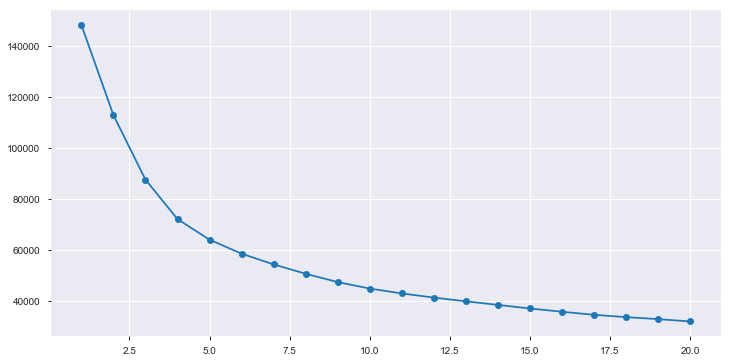

In [90]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Silhouette Coefficient

In [91]:
from sklearn import metrics

In [92]:
# calculate SC for K=3 through K=12
k_range = range(3, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr, km.labels_))

In [93]:
scores

[0.297535784275935,
 0.25531788925198495,
 0.23680694395007051,
 0.2346338686624264,
 0.23203472308913153,
 0.23356833654418566,
 0.23926794777543842,
 0.2432326590666866,
 0.24602850898853185]

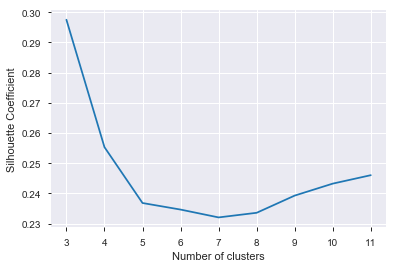

In [94]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

Note: 
The solution can be 4 based on the SC score. If we take highest SC score, 4 segment solution is best

In [95]:
df_pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(6)])

In [96]:
df_pair_plot['Cluster']=km_4.labels_

In [97]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,Cluster
0,-1.296651,-2.060586,0.079552,0.354869,-0.255660,-0.098358,3
1,-2.679818,3.164878,1.596264,-0.509222,-1.180508,-0.135295,2
2,0.798607,-0.312197,-0.213289,1.626809,0.298317,-1.626050,1
3,-0.613715,-0.573575,1.024830,1.774134,-0.641673,0.279015,3
4,-1.770159,-1.187123,-0.893246,1.255326,0.197530,-0.243719,3


C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametri

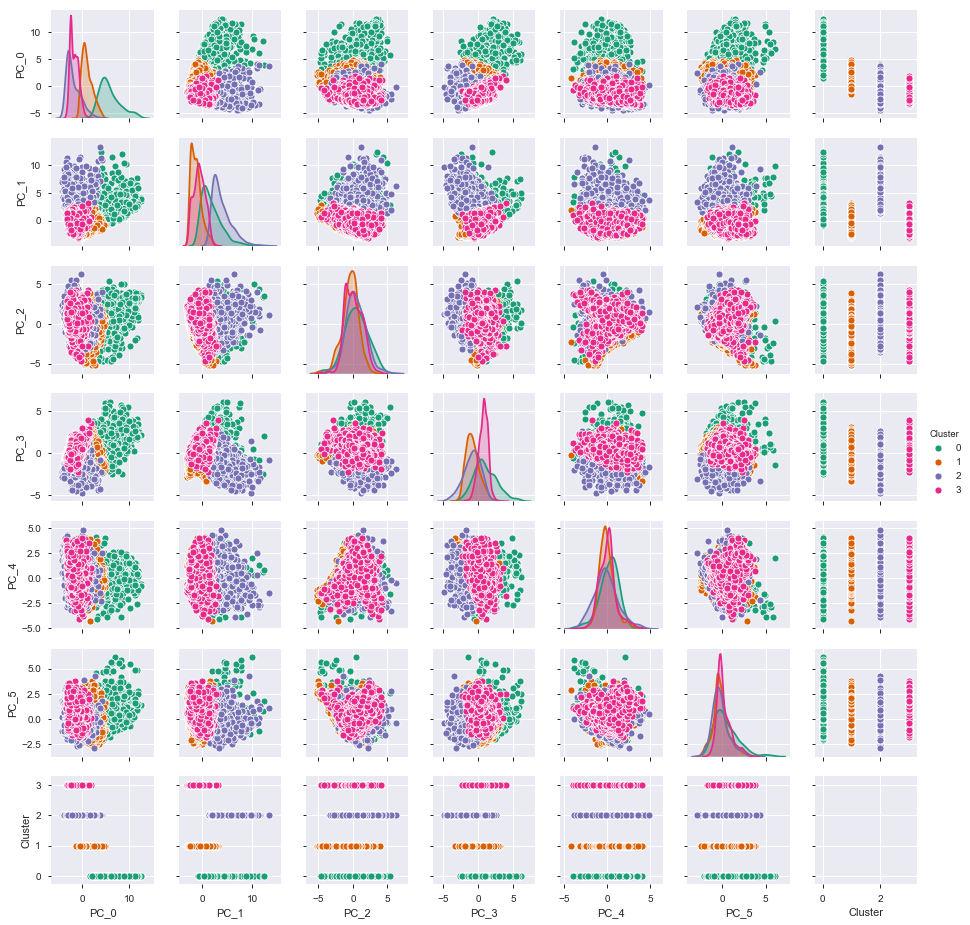

In [98]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)